# Chapter 8. Load balancing

# Céline Comte

This Notebook plots the numerical results for Chapter 8 of the Ph.D. thesis *Resource management in computer clusters: algorithm design and performance analysis* by Céline Comte. Lines give exact results and marks simulation results.

## Package imports and global variable definitions

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# uncomment this line if you prefer dynamic matplotlib plots
# %matplotlib notebook

# change the default figure size
#pylab.rcParams['figure.figsize'] = (10.0, 6.0)
pylab.rcParams['legend.fontsize'] = 12

In [3]:
# manipulate dataframes
import pandas as pd

In [4]:
# global variables
ρρ = linspace(5., 0, 10000, endpoint = False)
nb_tokens = 6

## A single job type

We consider the first scenario, in Section 8.3.1.
There are $I = 10$ computers, each with $\ell = 6$ tokens.
The first half have a unit service capacity $\mu$
and the other half have a service capacity $4 \mu$.
There is a single job type, i.e., all jobs can be assigned to any computer.
The external arrival rate is denoted by $\nu$.

In [5]:
# parameters
I = 10
ℓ = nb_tokens * ones(I, dtype=int)

### Comparison with the static load balancings

In [6]:
# load the external results
best_static = pd.read_csv('data/single-best-static-exact.csv')
uni_static = pd.read_csv('data/single-uni-static-exact.csv')
dynamic_exact = pd.read_csv('data/single-dynamic-exact.csv')
dynamic_hyperexp = pd.read_csv('data/single-dynamic-simu-hyperexp.csv')

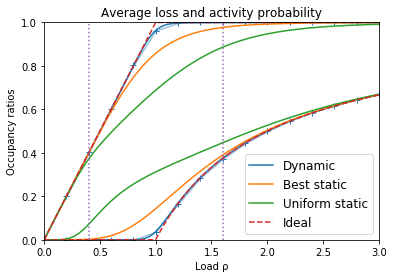

In [7]:
# occupancy ratios
figure()

# dynamic - exact results
plot(dynamic_exact['rho'], dynamic_exact['beta'], 'C0', label="Dynamic")
plot(dynamic_exact['rho'], dynamic_exact['eta'], 'C0', label="")

# dynamic - simulations with hyperexponentially distributed job sizes
plot(dynamic_hyperexp['rho'], dynamic_hyperexp['beta'], 'C0+', label="")
fill_between(dynamic_hyperexp['rho'],
             dynamic_hyperexp['beta'] - dynamic_hyperexp['wbeta'],
             dynamic_hyperexp['beta'] + dynamic_hyperexp['wbeta'], 
             color='C0', alpha=.4)
plot(dynamic_hyperexp['rho'], dynamic_hyperexp['eta'], 'C0+', label="")
fill_between(dynamic_hyperexp['rho'],
             dynamic_hyperexp['eta'] - dynamic_hyperexp['weta'],
             dynamic_hyperexp['eta'] + dynamic_hyperexp['weta'], 
             color='C0', alpha=.4)

# best static
plot(best_static['rho'], best_static['beta'], 'C1', label="Best static")
plot(best_static['rho'], best_static['eta'], 'C1', label="")

# uniform static
plot(uni_static['rho'], uni_static['beta'], 'C2', label="Uniform static")
plot(uni_static['rho'], uni_static['eta'], 'C2', label="")

# ideal
plot(ρρ, maximum(0, 1. - 1. / ρρ), 'C3--', label="Ideal")
plot(ρρ, minimum(1, ρρ), 'C3--')

# references
axvline(x=2/5, color='C4', linestyle=':')
axvline(x=8/5, color='C4', linestyle=':')

xlim(0, 3); ylim(0, 1)
legend(loc='best'); xlabel("Load ρ"); ylabel("Occupancy ratios")
title("Average loss and activity probability")
show()

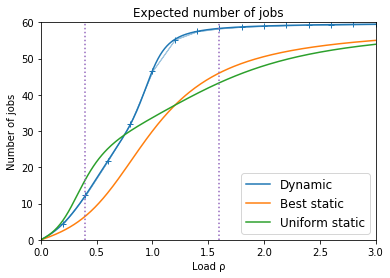

In [8]:
# mean number of jobs
figure()

# exact
plot(dynamic_exact['rho'], dynamic_exact['L'], 'C0', label="Dynamic")
plot(best_static['rho'], best_static['L'], 'C1', label="Best static")
plot(uni_static['rho'], uni_static['L'], 'C2', label="Uniform static")

# simulations - hyperexponentially distributed job sizes
plot(dynamic_hyperexp['rho'], dynamic_hyperexp['L'], 'C0+', label="")
fill_between(dynamic_hyperexp['rho'],
             dynamic_hyperexp['L'] - dynamic_hyperexp['wL'],
             dynamic_hyperexp['L'] + dynamic_hyperexp['wL'], 
             color='C0', alpha=.4)

# references
axvline(x=2/5, color='C4', linestyle=':')
axvline(x=8/5, color='C4', linestyle=':')

xlim(0, 3); ylim(0, sum(ℓ))
legend(loc='best'); xlabel("Load ρ"); ylabel("Number of jobs")
title("Expected number of jobs")
show()

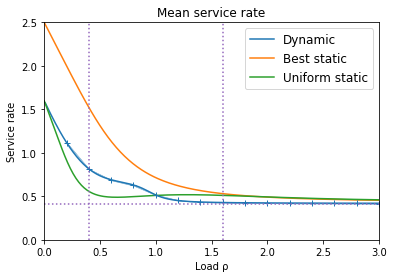

In [9]:
# mean service rate
figure()

# exact
plot(dynamic_exact['rho'], dynamic_exact['gamma'], label="Dynamic")
plot(best_static['rho'], best_static['gamma'], 'C1', label="Best static")
plot(uni_static['rho'], uni_static['gamma'], 'C2', label="Uniform static")

# simulations - hyperexponentially distributed job sizes
plot(dynamic_hyperexp['rho'], dynamic_hyperexp['gamma'], 'C0+', label="")
fill_between(dynamic_hyperexp['rho'],
             dynamic_hyperexp['gamma'] - dynamic_hyperexp['wgamma'],
             dynamic_hyperexp['gamma'] + dynamic_hyperexp['wgamma'], 
             color='C0', alpha=.4)

# references
axvline(x=2/5, color='C4', linestyle=':')
axvline(x=8/5, color='C4', linestyle=':')

axhline(y = 2.5 / nb_tokens, color='C4', linestyle=':')

xlim(0, 3); ylim(0, 2.5)
legend(loc='best'); xlabel("Load ρ"); ylabel("Service rate")
title("Mean service rate")
show()

### Per-computer metrics

In [10]:
# load the external results
best_static = pd.read_csv('data/single-best-static-exact.csv')
uni_static = pd.read_csv('data/single-uni-static-exact.csv')
dynamic_exact = pd.read_csv('data/single-dynamic-exact.csv')

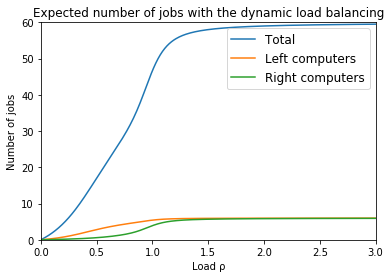

In [11]:
# mean number of jobs
figure()

plot(dynamic_exact['rho'], dynamic_exact['L'],
     'C0', label="Total")
plot(dynamic_exact['rho'], dynamic_exact['Li1'],
     'C1', label="Left computers")
plot(dynamic_exact['rho'], dynamic_exact['Li6'],
     'C2', label="Right computers")

xlim(0, 3); ylim(0, sum(ℓ))
legend(loc='best'); xlabel("Load ρ"); ylabel("Number of jobs")
title("Expected number of jobs with the dynamic load balancing")
show()

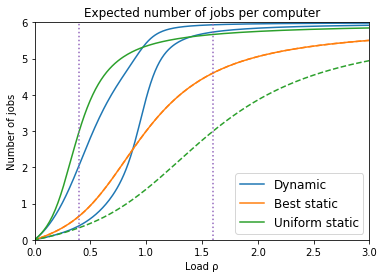

In [12]:
# mean number of jobs
figure()

# dynamic
plot(dynamic_exact['rho'], dynamic_exact['Li1'], 'C0', label="Dynamic")
plot(dynamic_exact['rho'], dynamic_exact['Li6'], 'C0', label="")

# best static
plot(best_static['rho'], best_static['Li1'], 'C1', label="Best static")
plot(best_static['rho'], best_static['Li6'], 'C1--', label="")

# uniform static
plot(uni_static['rho'], uni_static['Li1'], 'C2', label="Uniform static")
plot(uni_static['rho'], uni_static['Li6'], 'C2--', label="")

# references
axvline(x=2/5, color='C4', linestyle=':')
axvline(x=8/5, color='C4', linestyle=':')

xlim(0, 3); ylim(0, nb_tokens)
legend(loc='best'); xlabel("Load ρ"); ylabel("Number of jobs")
title("Expected number of jobs per computer")
show()

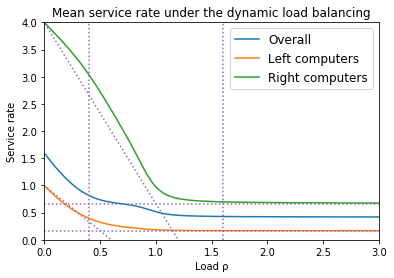

In [13]:
#### mean service rate at each computer
figure()

# dynamic
plot(dynamic_exact['rho'], dynamic_exact['gamma'], 'C0', label="Overall")
plot(dynamic_exact['rho'], dynamic_exact['gammai1'], 'C1',
     label="Left computers")
plot(dynamic_exact['rho'], dynamic_exact['gammai6'], 'C2',
     label="Right computers")

# references
axhline(y = 4 / nb_tokens, color='C4', linestyle=':')
axhline(y = 1 / nb_tokens, color='C4', linestyle=':')
axvline(x=2/5, color='C4', linestyle=':')
axvline(x=8/5, color='C4', linestyle=':')
plot(ρρ, 4. * (1. - (5/6) * ρρ), 'C4:')
plot(ρρ, 1. - (5/3) * ρρ, 'C4:')

xlim(0, 3); ylim(0, 4)
legend(loc='best'); xlabel("Load ρ"); ylabel("Service rate")
title("Mean service rate under the dynamic load balancing")
show()

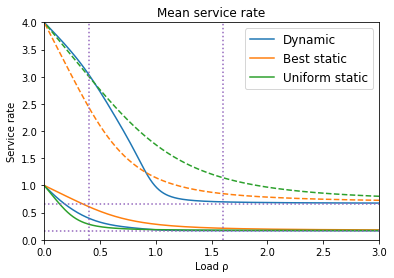

In [14]:
# mean service rate at each computer
figure()

# dynamic
plot(dynamic_exact['rho'], dynamic_exact['gammai1'], 'C0', label="Dynamic")
plot(dynamic_exact['rho'], dynamic_exact['gammai6'], 'C0', label="")

# best static
plot(best_static['rho'], best_static['gammai1'], 'C1', label="Best static")
plot(best_static['rho'], best_static['gammai6'], 'C1--', label="")

# uniform static
plot(uni_static['rho'], uni_static['gammai1'], 'C2-', label="Uniform static")
plot(uni_static['rho'], uni_static['gammai6'], 'C2--', label="")

# references
axhline(y = 4 / nb_tokens, color='C4', linestyle=':')
axhline(y = 1 / nb_tokens, color='C4', linestyle=':')
axvline(x=2/5, color='C4', linestyle=':')
axvline(x=8/5, color='C4', linestyle=':')

xlim(0, 3); ylim(0, 4)
legend(loc='best'); xlabel("Load ρ"); ylabel("Service rate")
title("Mean service rate")
show()

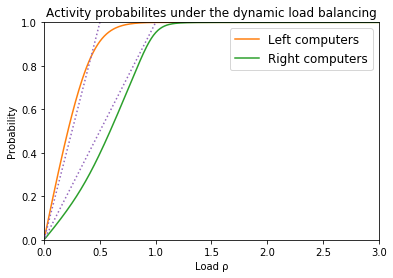

In [15]:
# probability that each computer is active
figure()

# dynamic
plot(dynamic_exact['rho'], dynamic_exact['etai1'],
     'C1', label="Left computers")
plot(dynamic_exact['rho'], dynamic_exact['etai6'],
     'C2', label="Right computers")

plot(ρρ, ρρ, 'C4:')
plot(ρρ, 2. * ρρ, 'C4:')

xlim(0, 3); ylim(0, 1)
legend(loc='best'); xlabel("Load ρ"); ylabel("Probability")
title("Activity probabilites under the dynamic load balancing")
show()

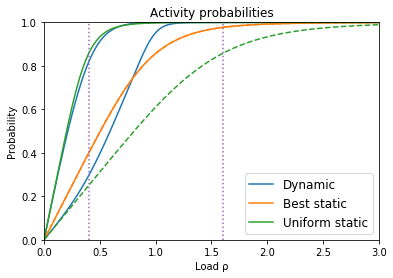

In [16]:
# idling probability
figure()

# dynamic
plot(dynamic_exact['rho'], dynamic_exact['etai1'], 'C0', label="Dynamic")
plot(dynamic_exact['rho'], dynamic_exact['etai6'], 'C0', label="")

# best static
plot(best_static['rho'], best_static['etai1'], 'C1-', label="Best static")
plot(best_static['rho'], best_static['etai6'], 'C1--', label="")

# uniform static
plot(uni_static['rho'], uni_static['etai1'], 'C2-', label="Uniform static")
plot(uni_static['rho'], uni_static['etai6'], 'C2--', label="")

axvline(x=2/5, color='C4', linestyle=':')
axvline(x=8/5, color='C4', linestyle=':')

xlim(0, 3); ylim(0, 1)
legend(loc='best'); xlabel("Load ρ"); ylabel("Probability")
title("Activity probabilities")
show()

### Impact of the number of tokens

In [17]:
# parameters
rg_tokens = [1,2,3,6,10]

In [18]:
# load the external results
dynamic_tokens_df = pd.read_csv('data/single-dynamic-exact-tokens.csv')

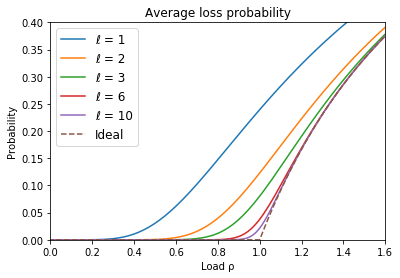

In [19]:
figure()

# dynamic
for nb_in_rg in rg_tokens:
    plot(dynamic_tokens_df['rho'], dynamic_tokens_df[str(nb_in_rg) + 'beta'],
         label="ℓ = " + str(nb_in_rg))

# ideal
plot(ρρ, maximum(0, 1 - 1. / ρρ), '--', label="Ideal")

xlim(0, 1.6); ylim(0, .4)
legend(loc='best')
xlabel("Load ρ"); ylabel("Probability")
title("Average loss probability")
show()

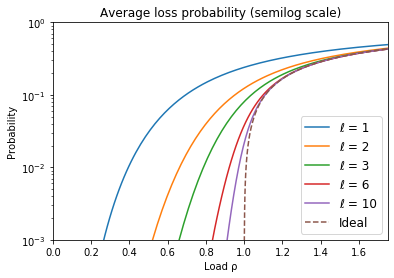

In [20]:
figure()

for nb_in_rg in rg_tokens:
    semilogy(dynamic_tokens_df['rho'], dynamic_tokens_df[str(nb_in_rg) + 'beta'], label="ℓ = " + str(nb_in_rg))
semilogy(ρρ, maximum(0, 1 - 1. / ρρ), '--', label="Ideal")

xlim(0, 1.75); ylim(0.001, 1.)
legend(loc='best')
xlabel("Load ρ"); ylabel("Probability")
title("Average loss probability (semilog scale)")
show()

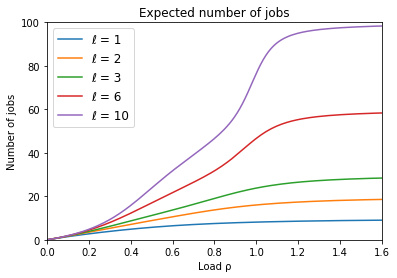

In [21]:
figure()

for nb_in_rg in rg_tokens:
    plot(dynamic_tokens_df['rho'],
         dynamic_tokens_df[str(nb_in_rg) + 'L'],
         label="ℓ = " + str(nb_in_rg))

xlim(0, 1.6); ylim(0, I * max(rg_tokens))
legend(loc='best')
xlabel("Load ρ"); ylabel("Number of jobs")
title("Expected number of jobs")
show()

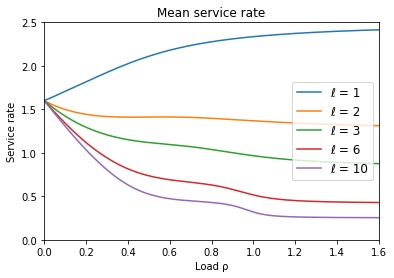

In [22]:
figure()

for nb_in_rg in rg_tokens:
    plot(dynamic_tokens_df['rho'],
         dynamic_tokens_df[str(nb_in_rg) + 'gamma'],
         label="ℓ = " + str(nb_in_rg))

xlim(0, 1.6); ylim(0, 2.5)
legend(loc=7);
xlabel("Load ρ"); ylabel("Service rate")
title("Mean service rate")
show()

## Two job types

We consider the second scenario, in Section 8.3.2.
There are $I = 10$ computers, each with $\ell = 6$ tokens.
All computers have the same unit service capacity $\mu$.
There are two job types.
Type-1 jobs arrive at a unit rate $\nu$
and can be assigned to any of the first seven computers.
Type-2 jobs arrive at rate $4 \nu$
and can be assigned to any of the last seven computers.

In [23]:
# parameters
I = 10
ℓ = nb_tokens * ones(I, dtype=int)

### Comparison with the static load balancings

In [24]:
# load the external results
best_static = pd.read_csv('data/multi-best-static-exact.csv')
uni_static = pd.read_csv('data/multi-uni-static-exact.csv')
dynamic_exact = pd.read_csv('data/multi-dynamic-exact.csv')
dynamic_hyperexp = pd.read_csv('data/multi-dynamic-simu-hyperexp.csv')

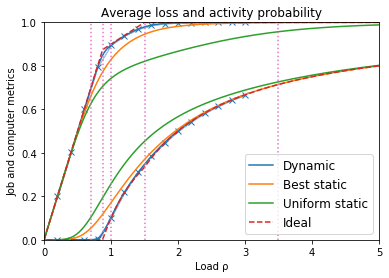

In [25]:
# average loss and activity probability
figure()

# dynamic - exact
plot(dynamic_exact['rho'], dynamic_exact['beta'], 'C0', label="Dynamic")
plot(dynamic_exact['rho'], dynamic_exact['eta'], 'C0', label="")

# dynamic - simulations with hyperexponentially distributed sizes
plot(dynamic_hyperexp['rho'], dynamic_hyperexp['beta'], 'C0x', label="")
fill_between(dynamic_hyperexp['rho'],
             dynamic_hyperexp['beta'] - dynamic_hyperexp['wbeta'],
             dynamic_hyperexp['beta'] + dynamic_hyperexp['wbeta'], 
             color='C0', alpha=.4)
plot(dynamic_hyperexp['rho'], dynamic_hyperexp['eta'], 'C0x', label="")
fill_between(dynamic_hyperexp['rho'],
             dynamic_hyperexp['eta'] - dynamic_hyperexp['weta'],
             dynamic_hyperexp['eta'] + dynamic_hyperexp['weta'], 
             color='C0', alpha=.4)

# best static
plot(best_static['rho'], best_static['beta'], 'C1', label="Best static")
plot(best_static['rho'], best_static['eta'], 'C1', label="")

# uniform static
plot(uni_static['rho'], uni_static['beta'], 'C2', label="Uniform static")
plot(uni_static['rho'], uni_static['eta'], 'C2', label="")

# ideal
ideal_loss = maximum(maximum(0, 1. - 1. / ρρ), 
                         (1./5.) * maximum(0, 1. - (7./2.) / ρρ) + (4./5.) * maximum(0, 1. - (7./8.) / ρρ))
plot(ρρ, ideal_loss, 'C3--', label="Ideal")
plot(ρρ, ρρ * (1. - ideal_loss), 'C3--')

# references
axvline(x=7/10, color='C6', linestyle=':')
axvline(x=7/8, color='C6', linestyle=':')
axvline(x=1, color='C6', linestyle=':')
axvline(x=3/2, color='C6', linestyle=':')
axvline(x=7/2, color='C6', linestyle=':')

xlim(0, 5); ylim(0, 1)
legend(loc='best')
xlabel("Load ρ"); ylabel("Job and computer metrics")
title("Average loss and activity probability")
show()

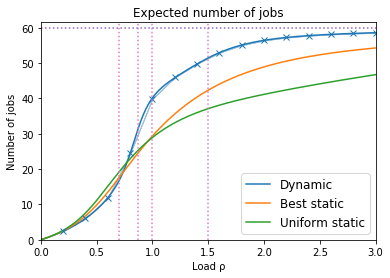

In [26]:
# mean number of jobs
figure()

# exact
plot(dynamic_exact['rho'], dynamic_exact['L'], 'C0', label="Dynamic")
plot(best_static['rho'], best_static['L'], 'C1', label="Best static")
plot(uni_static['rho'], uni_static['L'], 'C2', label="Uniform static")

# simulations - hyperexponentially distributed job sizes
plot(dynamic_hyperexp['rho'], dynamic_hyperexp['L'], 'C0x', label="")
fill_between(dynamic_hyperexp['rho'],
             dynamic_hyperexp['L'] - dynamic_hyperexp['wL'],
             dynamic_hyperexp['L'] + dynamic_hyperexp['wL'], 
             color='C0', alpha=.4)

# references
axvline(x=7/10, color='C6', linestyle=':')
axvline(x=7/8, color='C6', linestyle=':')
axvline(x=1, color='C6', linestyle=':')
axvline(x=3/2, color='C6', linestyle=':')
axvline(x=7/2, color='C6', linestyle=':')
axhline(y = sum(ℓ), color='C4', linestyle=':')

xlim(0, 3); ylim(ymin = 0)
legend(loc='best')
xlabel("Load ρ"); ylabel("Number of jobs")
title("Expected number of jobs")
show()

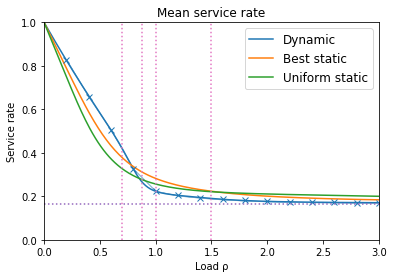

In [27]:
# mean service rate
figure()

# exact
plot(dynamic_exact['rho'], dynamic_exact['gamma'], label="Dynamic")
plot(best_static['rho'], best_static['gamma'], 'C1', label="Best static")
plot(uni_static['rho'], uni_static['gamma'], 'C2', label="Uniform static")

# simulations - hyperexponentially distributed job sizes
plot(dynamic_hyperexp['rho'], dynamic_hyperexp['gamma'], 'C0x', label="")
fill_between(dynamic_hyperexp['rho'],
             dynamic_hyperexp['gamma'] - dynamic_hyperexp['wgamma'],
             dynamic_hyperexp['gamma'] + dynamic_hyperexp['wgamma'], 
             color='C0', alpha=.4)

# references
axvline(x=7/10, color='C6', linestyle=':')
axvline(x=7/8, color='C6', linestyle=':')
axvline(x=1, color='C6', linestyle=':')
axvline(x=3/2, color='C6', linestyle=':')
axvline(x=7/2, color='C6', linestyle=':')
axhline(y = 1 / nb_tokens, color='C4', linestyle=':')

xlim(0, 3); ylim(0, 1)
legend(loc='best')
xlabel("Load ρ"); ylabel("Service rate")
title("Mean service rate")
show()

### Per-computer metrics

In [28]:
# load the external results
best_static = pd.read_csv('data/multi-best-static-exact.csv')
uni_static = pd.read_csv('data/multi-uni-static-exact.csv')
dynamic_exact = pd.read_csv('data/multi-dynamic-exact.csv')

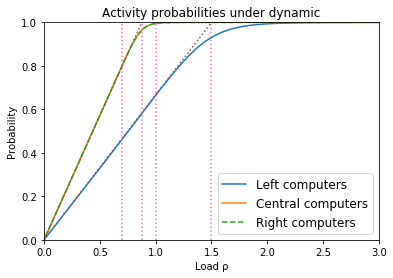

In [29]:
# probability that each computer is idle
figure()

# dynamic
plot(dynamic_exact['rho'], dynamic_exact['etai1'],
     'C0', label="Left computers")
plot(dynamic_exact['rho'], dynamic_exact['etai4'],
     'C1', label="Central computers")
plot(dynamic_exact['rho'], dynamic_exact['etai8'],
     'C2--', label="Right computers")

# references
axvline(x=7/10, color='C6', linestyle=':')
axvline(x=7/8, color='C6', linestyle=':')
axvline(x=1, color='C6', linestyle=':')
axvline(x=3/2, color='C6', linestyle=':')
axvline(x=7/2, color='C6', linestyle=':')

plot(ρρ, (2/3) * ρρ, color='C5', linestyle=':')
plot(ρρ, (8/7) * ρρ, color='C5', linestyle=':')

xlim(0, 3); ylim(0, 1)
legend(loc='best')
xlabel("Load ρ"); ylabel("Probability")
title("Activity probabilities under dynamic")
show()

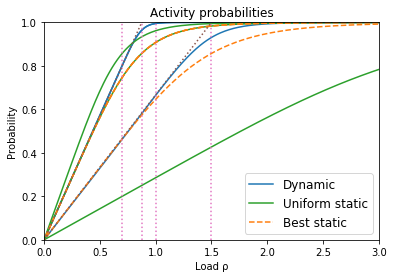

In [30]:
# probability that each computer is idle
figure()

# dynamic
plot(dynamic_exact['rho'], dynamic_exact['etai1'], 'C0', label="Dynamic")
plot(dynamic_exact['rho'], dynamic_exact['etai4'], 'C0', label="")
plot(dynamic_exact['rho'], dynamic_exact['etai8'], 'C0', label="")

# best static
plot(uni_static['rho'], uni_static['etai1'], 'C2', label="Uniform static")
plot(uni_static['rho'], uni_static['etai4'], 'C2', label="")
plot(uni_static['rho'], uni_static['etai8'], 'C2', label="")

# best static
plot(best_static['rho'], best_static['etai1'], 'C1--', label="Best static")
plot(best_static['rho'], best_static['etai4'], 'C1--', label="")
plot(best_static['rho'], best_static['etai8'], 'C1--', label="")

# references
axvline(x=7/10, color='C6', linestyle=':')
axvline(x=7/8, color='C6', linestyle=':')
axvline(x=1, color='C6', linestyle=':')
axvline(x=3/2, color='C6', linestyle=':')
axvline(x=7/2, color='C6', linestyle=':')

plot(ρρ, (2/3) * ρρ, color='C5', linestyle=':')
plot(ρρ, (8/7) * ρρ, color='C5', linestyle=':')

xlim(0, 3); ylim(0, 1)
legend(loc='best')
xlabel("Load ρ"); ylabel("Probability")
title("Activity probabilities")
show()

### Per-type performance and insensitivity

In [31]:
# load external results
dynamic_exact = pd.read_csv('data/multi-dynamic-exact.csv')
dynamic_exp = pd.read_csv('data/multi-dynamic-simu-exp.csv')
dynamic_hyperexp = pd.read_csv('data/multi-dynamic-simu-hyperexp.csv')

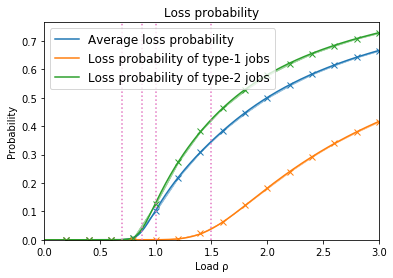

In [32]:
# averate loss probability
figure()

# exact
plot(dynamic_exact['rho'], dynamic_exact['beta'],
     'C0', label="Average loss probability")
plot(dynamic_exact['rho'], dynamic_exact['betak1'],
     'C1', label="Loss probability of type-1 jobs")
plot(dynamic_exact['rho'], dynamic_exact['betak2'],
     'C2', label="Loss probability of type-2 jobs")

# simulations - hyperexponentially distributed job sizes
plot(dynamic_hyperexp['rho'], dynamic_hyperexp['beta'], 'C0x', label="")
fill_between(dynamic_hyperexp['rho'],
             dynamic_hyperexp['beta'] - dynamic_hyperexp['wbeta'],
             dynamic_hyperexp['beta'] + dynamic_hyperexp['wbeta'], 
             color='C0', alpha=.4)
plot(dynamic_hyperexp['rho'], dynamic_hyperexp['betak1'], 'C1x', label="")
fill_between(dynamic_hyperexp['rho'],
             dynamic_hyperexp['betak1'] - dynamic_hyperexp['wbetak1'],
             dynamic_hyperexp['betak1'] + dynamic_hyperexp['wbetak1'], 
             color='C1', alpha=.4)
plot(dynamic_hyperexp['rho'], dynamic_hyperexp['betak2'], 'C2x', label="")
fill_between(dynamic_hyperexp['rho'],
             dynamic_hyperexp['betak2'] - dynamic_hyperexp['wbetak2'],
             dynamic_hyperexp['betak2'] + dynamic_hyperexp['wbetak2'], 
             color='C2', alpha=.4)

# references
axvline(x=7/10, color='C6', linestyle=':')
axvline(x=7/8, color='C6', linestyle=':')
axvline(x=1, color='C6', linestyle=':')
axvline(x=3/2, color='C6', linestyle=':')
axvline(x=7/2, color='C6', linestyle=':')

xlim(0, 3); ylim(ymin = 0)
legend(loc='best')
xlabel("Load ρ"); ylabel("Probability")
title("Loss probability")
show()

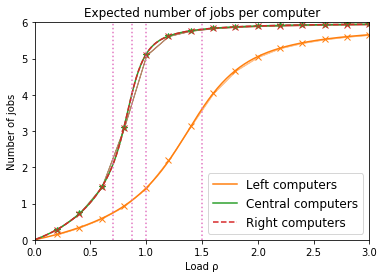

In [33]:
# mean number of jobs at each computer
figure()

# exact
plot(dynamic_exact['rho'], dynamic_exact['Li1'],
     'C1', label="Left computers")
plot(dynamic_exact['rho'], dynamic_exact['Li4'],
     'C2', label="Central computers")
plot(dynamic_exact['rho'], dynamic_exact['Li7'],
     'C3--', label="Right computers")

# simulations - hyperexponentially distributed job sizes
plot(dynamic_hyperexp['rho'], dynamic_hyperexp['Li1'], 'C1x', label="")
fill_between(dynamic_hyperexp['rho'],
             dynamic_hyperexp['Li1'] - dynamic_hyperexp['wLi1'],
             dynamic_hyperexp['Li1'] + dynamic_hyperexp['wLi1'], 
             color='C1', alpha=.4)
plot(dynamic_hyperexp['rho'], dynamic_hyperexp['Li4'], 'C2*', label="")
fill_between(dynamic_hyperexp['rho'],
             dynamic_hyperexp['Li4'] - dynamic_hyperexp['wLi4'],
             dynamic_hyperexp['Li4'] + dynamic_hyperexp['wLi4'], 
             color='C2', alpha=.4)
plot(dynamic_hyperexp['rho'], dynamic_hyperexp['Li8'], 'C3x', label="")
fill_between(dynamic_hyperexp['rho'],
             dynamic_hyperexp['Li8'] - dynamic_hyperexp['wLi8'],
             dynamic_hyperexp['Li8'] + dynamic_hyperexp['wLi8'], 
             color='C3', alpha=.4)

# references
axvline(x=7/10, color='C6', linestyle=':')
axvline(x=7/8, color='C6', linestyle=':')
axvline(x=1, color='C6', linestyle=':')
axvline(x=3/2, color='C6', linestyle=':')
axvline(x=7/2, color='C6', linestyle=':')

axhline(y = 3 * nb_tokens, color='C4', linestyle=':')
axhline(y = 4 * nb_tokens, color='C4', linestyle=':')
axhline(y = 10 * nb_tokens, color='C4', linestyle=':')

xlim(0, 3); ylim(0, nb_tokens)
legend(loc='best')
xlabel("Load ρ"); ylabel("Number of jobs")
title("Expected number of jobs per computer")
show()

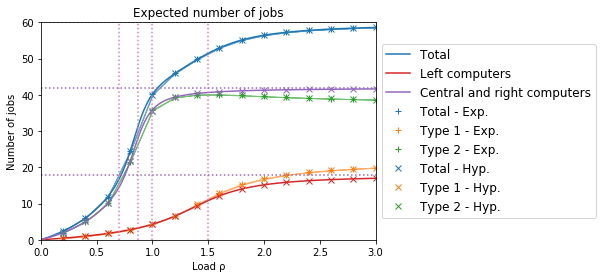

In [34]:
# mean number of jobs of each type
figure()

# exact
plot(dynamic_exact['rho'], dynamic_exact['L'], 'C0', label="Total")
plot(dynamic_exact['rho'], dynamic_exact['Li1'] + dynamic_exact['Li2'] + dynamic_exact['Li3'],
     'C3', label="Left computers")
plot(dynamic_exact['rho'],
      dynamic_exact['Li4'] + dynamic_exact['Li5'] + dynamic_exact['Li6'] + dynamic_exact['Li7']
     + dynamic_exact['Li8'] + dynamic_exact['Li9'] + dynamic_exact['Li10'],
     'C4', label="Central and right computers")

# simulations - exponentially distributed job sizes
plot(dynamic_exp['rho'], dynamic_exp['L'], 'C0+', label="Total - Exp.")
fill_between(dynamic_exp['rho'],
             dynamic_exp['L'] - dynamic_exp['wL'],
             dynamic_exp['L'] + dynamic_exp['wL'], 
             color='C0', alpha=.4)
plot(dynamic_exp['rho'], dynamic_exp['Lk1'], 'C1+', label="Type 1 - Exp.")
fill_between(dynamic_exp['rho'],
             dynamic_exp['Lk1'] - dynamic_exp['wLk1'],
             dynamic_exp['Lk1'] + dynamic_exp['wLk1'], 
             color='C1', alpha=.4)
plot(dynamic_exp['rho'], dynamic_exp['Lk2'], 'C2+', label="Type 2 - Exp.")
fill_between(dynamic_exp['rho'],
             dynamic_exp['Lk2'] - dynamic_exp['wLk2'],
             dynamic_exp['Lk2'] + dynamic_exp['wLk2'], 
             color='C2', alpha=.4)

# simulations - hyperexponentially distributed job sizes
plot(dynamic_hyperexp['rho'], dynamic_hyperexp['L'], 'C0x', label="Total - Hyp.")
fill_between(dynamic_hyperexp['rho'],
             dynamic_hyperexp['L'] - dynamic_hyperexp['wL'],
             dynamic_hyperexp['L'] + dynamic_hyperexp['wL'], 
             color='C0', alpha=.4)
plot(dynamic_hyperexp['rho'], dynamic_hyperexp['Lk1'], 'C1x', label="Type 1 - Hyp.")
fill_between(dynamic_hyperexp['rho'],
             dynamic_hyperexp['Lk1'] - dynamic_hyperexp['wLk1'],
             dynamic_hyperexp['Lk1'] + dynamic_hyperexp['wLk1'], 
             color='C1', alpha=.4)
plot(dynamic_hyperexp['rho'], dynamic_hyperexp['Lk2'], 'C2x', label="Type 2 - Hyp.")
fill_between(dynamic_hyperexp['rho'],
             dynamic_hyperexp['Lk2'] - dynamic_hyperexp['wLk2'],
             dynamic_hyperexp['Lk2'] + dynamic_hyperexp['wLk2'], 
             color='C2', alpha=.4)

plot(dynamic_hyperexp['rho'], dynamic_hyperexp['Li1']
     + dynamic_hyperexp['Li2'] + dynamic_hyperexp['Li3'], 'C3x')
plot(dynamic_hyperexp['rho'],
     dynamic_hyperexp['Li4'] + dynamic_hyperexp['Li5']
     + dynamic_hyperexp['Li6'] + dynamic_hyperexp['Li7']
     + dynamic_hyperexp['Li8'] + dynamic_hyperexp['Li9'] + dynamic_hyperexp['Li10'],
     'C4x')

# reference
axvline(x=7/10, color='C6', linestyle=':')
axvline(x=7/8, color='C6', linestyle=':')
axvline(x=1, color='C6', linestyle=':')
axvline(x=3/2, color='C6', linestyle=':')
axvline(x=7/2, color='C6', linestyle=':')

axhline(y = 3 * nb_tokens, color='C4', linestyle=':')
axhline(y = 7 * nb_tokens, color='C4', linestyle=':')
axhline(y = 10 * nb_tokens, color='C4', linestyle=':')

xlim(0, 3); ylim(0, sum(ℓ))
legend(loc="center left", bbox_to_anchor = (1, .5))
title("Expected number of jobs")
xlabel("Load ρ"); ylabel("Number of jobs")
show()

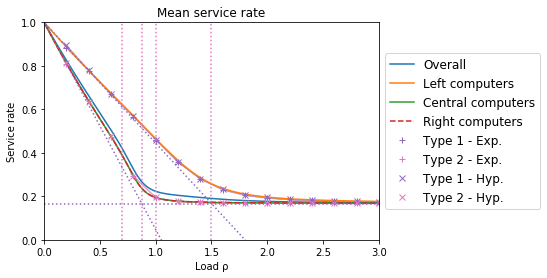

In [35]:
# mean service rate
figure()

# exact
plot(dynamic_exact['rho'], dynamic_exact['gamma'], 'C0',
     label="Overall")
plot(dynamic_exact['rho'], dynamic_exact['gammai1'], 'C1',
     label='Left computers')
plot(dynamic_exact['rho'], dynamic_exact['gammai4'], 'C2',
     label='Central computers')
plot(dynamic_exact['rho'], dynamic_exact['gammai8'], 'C3--',
     label='Right computers')

# simulations - exponentially distributed job sizes
plot(dynamic_exp['rho'], dynamic_exp['gammak1'], 'C4+', label="Type 1 - Exp.")
fill_between(dynamic_exp['rho'],
             dynamic_exp['gammak1'] - dynamic_exp['wgammak1'],
             dynamic_exp['gammak1'] + dynamic_exp['wgammak1'], 
             color='C4', alpha=.4)
plot(dynamic_exp['rho'], dynamic_exp['gammak2'], 'C6+', label="Type 2 - Exp.")
fill_between(dynamic_exp['rho'],
             dynamic_exp['gammak2'] - dynamic_exp['wgammak2'],
             dynamic_exp['gammak2'] + dynamic_exp['wgammak2'], 
             color='C6', alpha=.4)

# simulations - hyperexponentially distributed job sizes
plot(dynamic_hyperexp['rho'], dynamic_hyperexp['gammak1'], 'C4x', label="Type 1 - Hyp.")
fill_between(dynamic_hyperexp['rho'],
             dynamic_hyperexp['gammak1'] - dynamic_hyperexp['wgammak1'],
             dynamic_hyperexp['gammak1'] + dynamic_hyperexp['wgammak1'], 
             color='C4', alpha=.4)
plot(dynamic_hyperexp['rho'], dynamic_hyperexp['gammak2'], 'C6x', label="Type 2 - Hyp.")
fill_between(dynamic_hyperexp['rho'],
             dynamic_hyperexp['gammak2'] - dynamic_hyperexp['wgammak2'],
             dynamic_hyperexp['gammak2'] + dynamic_hyperexp['wgammak2'], 
             color='C6', alpha=.4)

# references
axvline(x=7/10, color='C6', linestyle=':')
axvline(x=7/8, color='C6', linestyle=':')
axvline(x=1, color='C6', linestyle=':')
axvline(x=3/2, color='C6', linestyle=':')
axvline(x=7/2, color='C6', linestyle=':')

axhline(y = 1 / nb_tokens, color='C4', linestyle=':')

plot(ρρ, 1. - (20/21) * ρρ, color='C4', linestyle=':')
plot(ρρ, 1. - (5/9) * ρρ, color='C4', linestyle=':')

xlim(0, 3); ylim(0, 1)
legend(loc="center left", bbox_to_anchor = (1, .5))
xlabel("Load ρ"); ylabel("Service rate")
title("Mean service rate")
show()

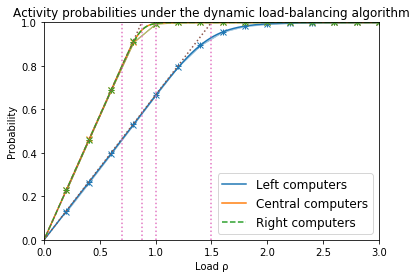

In [36]:
# activity probability
figure()

# exact
plot(dynamic_exact['rho'], dynamic_exact['etai1'], 'C0',
     label="Left computers")
plot(dynamic_exact['rho'], dynamic_exact['etai4'], 'C1',
     label="Central computers")
plot(dynamic_exact['rho'], dynamic_exact['etai7'], 'C2--',
     label="Right computers")

# simulations - exponentially distributed job sizes
for i, server in enumerate([1, 4, 8]):
    plot(dynamic_exp['rho'], dynamic_exp['etai%d' % server], 'C%d+' % i, label="")
    fill_between(dynamic_exp['rho'],
                 dynamic_exp['etai%d' % server] - dynamic_exp['wetai%d' % server],
                 dynamic_exp['etai%d' % server] + dynamic_exp['wetai%d' % server], 
                 color='C%d' % i, alpha=.2)

# simulations - hyperexponentially distributed job sizes
for i, server in enumerate([1, 4, 8]):
    plot(dynamic_hyperexp['rho'], dynamic_hyperexp['etai%d' % server], 'C%sx' % i, label="")
    fill_between(dynamic_hyperexp['rho'],
                 dynamic_hyperexp['etai%d' % server] - dynamic_hyperexp['wetai%d' % server],
                 dynamic_hyperexp['etai%d' % server] + dynamic_hyperexp['wetai%d' % server], 
                 color='C%d' % i, alpha=.2)

# references
axvline(x=7/10, color='C6', linestyle=':')
axvline(x=7/8, color='C6', linestyle=':')
axvline(x=1, color='C6', linestyle=':')
axvline(x=3/2, color='C6', linestyle=':')
axvline(x=7/2, color='C6', linestyle=':')

plot(ρρ, (2/3) * ρρ, color='C5', linestyle=':')
plot(ρρ, (8/7) * ρρ, color='C5', linestyle=':')

xlim(0, 3); ylim(0, 1)
legend(loc='best')
xlabel("Load ρ"); ylabel("Probability")
title("Activity probabilities under the dynamic load-balancing algorithm")
xlabel("Load ρ"); ylabel("Probability")
show()

We verify the maximum width of the asymptotic confidence intervals for the metrics that are plotted in the paper:

In [37]:
print('Maximum width of the asymptotic 95% confidence interval '
      + 'with the exponential job size distribution:')
for variable in ['Lk1', 'Lk2']:
    print(variable + ' : %f' % nanmax(dynamic_exp['w' + variable]))

Maximum width of the asymptotic 95% confidence interval with the exponential job size distribution:
Lk1 : 0.021782
Lk2 : 0.020421


In [38]:
print('Maximum width of the asymptotic 95% confidence interval '
      + 'with the hyperexponential job size distribution:')
for variable in ['betak1', 'betak2', 'Lk1', 'Lk2']:
    print(variable + ' : %f' % nanmax(dynamic_hyperexp['w' + variable]))

Maximum width of the asymptotic 95% confidence interval with the hyperexponential job size distribution:
betak1 : 0.000814
betak2 : 0.001003
Lk1 : 0.023814
Lk2 : 0.057087


For the simulation results presented in the manuscript, the values were as follows: